In [1]:
#add ../ to the path
import sys
sys.path.append("../")
import numpy as np
import pynbody
from SimInfoDicts.MerianCDM import Sims
#from SimInfoDicts.BWMDC import Sims


In [2]:
sim = Sims['r431']
s = pynbody.load(sim['path'])
s.physical_units()
h = s.halos()

In [3]:

halo = h[1]
pynbody.analysis.angmom.faceon(halo)

In [11]:
decomp_s = pynbody.analysis.decomp(halo.s)

pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane
pynbody.analysis.profile : Profile pot -- this routine assumes the disk is in the x-y plane


In [27]:
print(len(halo.g),len(halo.s))

2777645 2292934


In [4]:
profiles = pynbody.analysis.profile.Profile(halo.s)

In [ ]:
jx,jy,jz = profiles['j']

In [8]:

j_circ = profiles['j_circ']

pynbody.analysis.profile : Profile v_circ -- this routine assumes the disk is in the x-y plane


In [ ]:
#plot r vs decomp['j_circ']
import matplotlib.pyplot as plt
plt.plot(decomp_s['r'],decomp_s['j_circ'])
plt.plot(decomp_g['r'],decomp_g['j_circ'])
plt.xlabel('r [kpc]')
plt.ylabel('j_circ [kpc km/s]')
plt.show()


In [25]:
def compute_total_jz_jcirc(h):
    
    # Calculate Jz/Jcirc for each particle
    jz_jcirc = h['j'][:, 2] / h['j_circ']
    #histogram of jz_jcirc
    plt.hist(jz_jcirc, bins=1000,density=True)
    plt.xlabel('Jz/Jcirc')
    plt.ylabel('Density')
    plt.xlim(-1,6)
    
    #plot lines at x = 0,1
    plt.axvline(x=0, color='r', linestyle='--')
    plt.axvline(x=1, color='r', linestyle='--')
    
        #plot r vs jz_jcirc
        # Calculate the total Jz/Jcirc for the galaxy
    total_jz_jcirc = np.sum(jz_jcirc)
    print(f"Total Jz/Jcirc for the galaxy particle wise : {total_jz_jcirc}")
    J_total = np.sum(h['j'], axis=0)
    print(f"Total angular momentum for the galaxy: {J_total}")
    J_circ_total = np.sum(h['j_circ'])
    Jz_total = np.sum(h['j'][:, 2])
    jz_jcirc_total = Jz_total / J_circ_total
    print(f"Total Jz/Jcirc for the galaxy galaxy wise: {jz_jcirc_total}")
    
    return jz_jcirc

Total Jz/Jcirc for the galaxy particle wise : 3012772.9032245576
Total angular momentum for the galaxy: [1.96796107e+06 7.30146791e+06 2.87563061e+08]
Total Jz/Jcirc for the galaxy galaxy wise: 1.5328829599374219
Total Jz/Jcirc for the galaxy: [-0.17028458  1.83374581 -0.20532819 ...  0.39404765  0.10275658
  0.85173519]


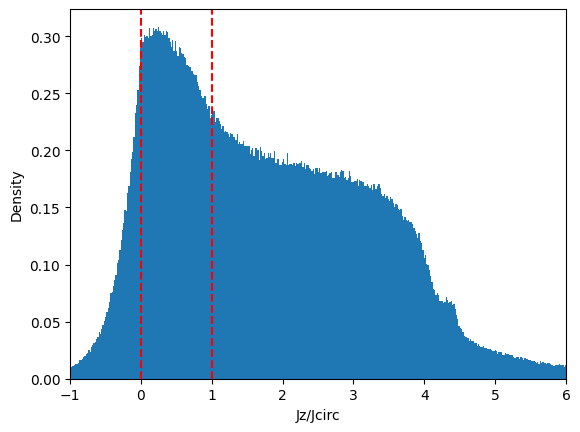

In [26]:
sphere = pynbody.filt.Sphere('5 kpc')

total_jz_jcirc = compute_total_jz_jcirc(halo.s[sphere])
print(f"Total Jz/Jcirc for the galaxy: {total_jz_jcirc}")

In [8]:
total_jz_jcirc = compute_total_jz_jcirc(halo.g)
print(f"Total Jz/Jcirc for the galaxy: {total_jz_jcirc}")

KeyError: 'No array j_circ for family gas'

In [72]:
#remove componets where j_circ is inf

[4.57615105e+08 6.25642173e+07 4.31207690e+09] inf


In [ ]:
def calculate_jz_jcirc_ratio(halo):
    """
    Calculate the ratio of Jz/Jcirc for particles in a halo.
    
    Parameters:
    halo (pynbody.snapshot.SimSnap): The halo to analyze
    center_and_align (bool): Whether to center and align the halo before calculation
    
    Returns:
    numpy.ndarray: Array of Jz/Jcirc ratios for each particle
    """
    

    
    # Get positions and velocities
    pos = np.array([halo['x'], halo['y'], halo['z']]).T
    vel = np.array([halo['vx'], halo['vy'], halo['vz']]).T
    
    # Calculate r and phi in cylindrical coordinates
    r_xy = np.sqrt(pos[:,0]**2 + pos[:,1]**2)
    phi = np.arctan2(pos[:,1], pos[:,0])
    
    # Calculate circular velocity (v_circ)
    v_circ_magnitude = np.sqrt(pynbody.gravity.calc.midplane_potential(halo,r_xy)/r_xy)
    
    # Calculate v_circ vector (in x-y plane)
    v_circ = np.zeros_like(vel)
    v_circ[:,0] = -v_circ_magnitude * np.sin(phi)
    v_circ[:,1] = v_circ_magnitude * np.cos(phi)
    
    # Calculate Jcirc (z-component only)
    j_circ = np.cross(pos, v_circ)[:,2]
    
    # Calculate Jz (actual angular momentum in z-direction)
    j_z = np.cross(pos, vel)[:,2]
    
    # Calculate the ratio Jz/Jcirc
    ratio = j_z / j_circ
    
    return ratio

# Calculate the Jz/Jcirc ratio for the halo
jz_jcirc_ratio = calculate_jz_jcirc_ratio(halo)


In [85]:
#inspect pynbody dirs
print(dir(pynbody.gravity.calc))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'all_direct', 'all_pm', 'array', 'config', 'direct', 'eps_as_simarray', 'get_eps', 'math', 'midplane_potential', 'midplane_rot_curve', 'np', 'pm', 'tree', 'treecalc', 'units', 'warnings']


In [161]:
print(sim['goodhalos']

SyntaxError: incomplete input (1935196138.py, line 1)

In [76]:
Sims['r431']


{'path': '/home/bk639/data/MerianCDM/r431.romulus25.3072g1HsbBH/r431.romulus25.3072g1HsbBH.004096/r431.romulus25.3072g1HsbBH.004096',
 'halos': [1],
 'goodhalos': [1]}

In [ ]:
sim = Sims['cptmarvel']

s = pynbody.load(sim['path'])
s.physical_units()
h = s.halos()
print(len(h[1],len(h[2])))

In [94]:
sim = Sims['cptmarvel']
import pynbody


In [116]:

s = pynbody.load(sim['path'])
s.physical_units()

h_dummy = s.halos(dummy=True)
halos = s.halos()

#load profile
import pickle
Profiles = pickle.load(open('../../Data/cptmarvel.BWMDC.Profiles.pickle','rb'))
ahf_h = pynbody.halo.ahf.AHFCatalogue(s)
ahf_h.physical_units()



pynbody.halo : An error occurred while reading substructure file. Falling back to using the halo info.
pynbody.halo : An error occurred while reading substructure file. Falling back to using the halo info.


In [ ]:
#check what properties I can get from each catalog in halo 1

In [1]:
halos[1]

NameError: name 'halos' is not defined

In [117]:
halos[1].properties

{'omegaM0': 0.24,
 'omegaL0': 0.76,
 'h': 0.7299490542599526,
 'boxsize': Unit("2.50e+04 kpc"),
 'a': 1.0000000000142635,
 'time': Unit("1.40e+01 kpc s km**-1"),
 'halo_id': 1}

In [118]:
ahf_h[1].properties

{'omegaM0': 0.24,
 'omegaL0': 0.76,
 'h': 0.7299490542599526,
 'boxsize': Unit("2.50e+04 kpc"),
 'a': 1.0000000000142635,
 'time': Unit("1.40e+01 kpc s km**-1"),
 'halo_id': 1,
 'ID': 7494128790532563721,
 'hostHalo': 0,
 'numSubStruct': 156,
 'mass': 11333600000.0,
 'npart': 2719941,
 'Xc': 9127.20813553,
 'Yc': 7836.42362558,
 'Zc': 9851.41752882,
 'VXc': -25.72,
 'VYc': -39.25,
 'VZc': 33.27,
 'Rvir': 36.53,
 'Rmax': 4.64,
 'r2': 0.75909,
 'mbp_offset': 0.00699,
 'com_offset': 0.39037,
 'Vmax': 43.34,
 'v_esc': 51.672117,
 'sigV': 42.82,
 'lambda': 0.020354,
 'lambdaE': 0.021057,
 'Lx': 0.3247,
 'Ly': -0.4024,
 'Lz': -0.856,
 'b_axis': 0.979615,
 'c_axis': 0.87033,
 'Eax': -0.091573,
 'Eay': 0.599643,
 'Eaz': 0.795011,
 'Ebx': -0.673212,
 'Eby': 0.550999,
 'Ebz': -0.493139,
 'Ecx': 0.733757,
 'Ecy': 0.580369,
 'Ecz': -0.35323,
 'ovdens': 200.0,
 'nbins': 36,
 'fMhires': 1.0,
 'Ekin': 10389900000000.0,
 'Epot': -18483100000000.0,
 'SurfP': -1186040000000.0,
 'Phi0': 7950.62,
 'cNFW':

In [119]:
h_dummy[1].properties

{'omegaM0': 0.24,
 'omegaL0': 0.76,
 'h': 0.7299490542599526,
 'boxsize': Unit("2.50e+04 kpc"),
 'a': 1.0000000000142635,
 'time': Unit("1.40e+01 kpc s km**-1"),
 'halo_id': 1,
 'ID': 7494128790532563721,
 'hostHalo': 0,
 'numSubStruct': 156,
 'mass': 11333600000.0,
 'npart': 2719941,
 'Xc': 9127.20813553,
 'Yc': 7836.42362558,
 'Zc': 9851.41752882,
 'VXc': -25.72,
 'VYc': -39.25,
 'VZc': 33.27,
 'Rvir': 36.53,
 'Rmax': 4.64,
 'r2': 0.75909,
 'mbp_offset': 0.00699,
 'com_offset': 0.39037,
 'Vmax': 43.34,
 'v_esc': 51.672117,
 'sigV': 42.82,
 'lambda': 0.020354,
 'lambdaE': 0.021057,
 'Lx': 0.3247,
 'Ly': -0.4024,
 'Lz': -0.856,
 'b_axis': 0.979615,
 'c_axis': 0.87033,
 'Eax': -0.091573,
 'Eay': 0.599643,
 'Eaz': 0.795011,
 'Ebx': -0.673212,
 'Eby': 0.550999,
 'Ebz': -0.493139,
 'Ecx': 0.733757,
 'Ecy': 0.580369,
 'Ecz': -0.35323,
 'ovdens': 200.0,
 'nbins': 36,
 'fMhires': 1.0,
 'Ekin': 10389900000000.0,
 'Epot': -18483100000000.0,
 'SurfP': -1186040000000.0,
 'Phi0': 7950.62,
 'cNFW':

In [ ]:
for i in [1]:#Sims['cptmarvel']['goodhalos']:
    Reff = Profiles[str(i)]['x000y000']['Reff']
    halo = h[int(i)]
    halo.physical_units()
    m_tot = halo['mass'].sum().in_units('Msol')
    dm_mass = halo.d['mass'].sum().in_units('Msol')
    star_mass = halo.s['mass'].sum().in_units('Msol')
    gas_mass = halo.g['mass'].sum().in_units('Msol')
    print(f'Total mass: {m_tot}')
    print(f'Dark matter mass: {dm_mass}')
    print(f'Stellar mass: {star_mass}')
    print(f'Gas mass: {gas_mass}')
    print(f'Difference: {m_tot - (dm_mass + star_mass + gas_mass)}')


In [150]:
def halos_check(halos,ahf_h):
   
    for i in [2]:
        print(f'Halo {i}:')
        #compare centers 
        ahf_cen = pynbody.array.SimArray([ahf_h[i].properties['Xc'],ahf_h[i].properties['Yc'],ahf_h[i].properties['Zc']],'kpc')
        print(f'Center from AHF: {ahf_cen}')
        
        with pynbody.analysis.halo.center(halos[i],mode='hyb'):
                     #compare virial radii
            print(f'Virial radius from pynbody: {pynbody.analysis.halo.virial_radius(halos[i],overden=200)}')
            print(f'Virial radius from AHF: {ahf_h[i].properties["Rvir"]}')
            #compare massses
            print(f'Mass from pynbody: {halos[i].properties["mass"]}')
            print(f'Mass from AHF: {ahf_h[i].properties["mass"]}')
            
            #print(f'Center from pynbody: {halos[i]['pos'][0]}')
            
            
        print(f'Center from pynbody: {halos[i]['pos'][0].in_units("kpc")}')   
        
halos_check(h,ahf_h)  

Halo 2:
Center from AHF: [8116.03229889 8107.22304862 9633.63900271]
Virial radius from pynbody: 69.26515141251531
Virial radius from AHF: 31.42
Mass from pynbody: 7213730000.0
Mass from AHF: 7213730000.0
Center from pynbody: [  357.82475607   907.62825839 -1091.03143552]


In [149]:
for i in [1,2,3]:
    #units are in kpc/h

    print(h_c)
    ahf_cen = pynbody.array.SimArray([ahf_h[i].properties['Xc']*h_c,ahf_h[i].properties['Yc']*h_c,ahf_h[i].properties['Zc']*h_c],'kpc')
    print(f'Center from AHF: {ahf_cen}')

0.7299490542599526
Center from AHF: [6662.39694656 5720.19001427 7191.03290828]
0.7299490542599526
Center from AHF: [5924.29010092 5917.85979701 7032.06567911]
0.7299490542599526
Center from AHF: [6360.32893115 6267.16562931 7280.6906278 ]


In [71]:
rvir = pynbody.analysis.halo.virial_radius(h[1],overden=300)

In [72]:
rvir

SimArray(60.52741551, 'kpc')

In [ ]:
Reff = pynbody.array.SimArray(Reff, 'kpc')
print(Reff)

pynbody.halo : An error occurred while reading substructure file. Falling back to using the halo info.


In [101]:
ahf_h[2].properties

{'omegaM0': 0.24,
 'omegaL0': 0.76,
 'h': 0.7299490542599526,
 'boxsize': Unit("2.50e+04 kpc"),
 'a': 1.0000000000142635,
 'time': Unit("1.40e+01 kpc s km**-1"),
 'halo_id': 2,
 'ID': 7430249380296815144,
 'hostHalo': 0,
 'numSubStruct': 105,
 'mass': 7213730000.0,
 'npart': 1878061,
 'Xc': 8116.03229889,
 'Yc': 8107.22304862,
 'Zc': 9633.63900271,
 'VXc': -13.47,
 'VYc': -79.94,
 'VZc': 16.67,
 'Rvir': 31.42,
 'Rmax': 5.57,
 'r2': 19.98018,
 'mbp_offset': 4.55028,
 'com_offset': 1.21254,
 'Vmax': 38.22,
 'v_esc': 44.502447,
 'sigV': 37.02,
 'lambda': 0.030496,
 'lambdaE': 0.030688,
 'Lx': -0.4339,
 'Ly': -0.8333,
 'Lz': 0.3426,
 'b_axis': 0.868299,
 'c_axis': 0.784147,
 'Eax': -0.657146,
 'Eay': 0.731787,
 'Eaz': 0.180686,
 'Ebx': 0.241345,
 'Eby': -0.022817,
 'Ebz': 0.970171,
 'Ecx': 0.714081,
 'Ecy': 0.681152,
 'Ecz': -0.161619,
 'ovdens': 200.0,
 'nbins': 35,
 'fMhires': 0.999666,
 'Ekin': 4944130000000.0,
 'Epot': -8550340000000.0,
 'SurfP': -779382000000.0,
 'Phi0': 5362.86,
 'cN

In [83]:
print(ahf_h[1].properties['mass'])

KeyError: 'mass'

In [67]:
rvir_ahf = ahf_h[2].properties['Rvir']

In [69]:
rvir_ahf = pynbody.array.SimArray(rvir_ahf, 'kpc')
print(rvir_ahf)

31.42


In [70]:
rvir_ahf

SimArray(31.42, 'kpc')

In [64]:
m_vir_within_r, m_star, m_gas, mb_mvir_within_r,HI_within_r = mass_properties_within_r(h[1],rvir_ahf)
m,_,_,_,_ = mass_properties_within_r(h[2],rvir)

1078361 55462 380117
1390927 55462 431672


In [65]:
print(m_vir_within_r, m_star, m_gas, mb_mvir_within_r,HI_within_r)
print(np.log10(mb_mvir_within_r))

7727127421.474011 14920985.364372073 526913293.41465724 0.07012104877075652 nan
-1.1541515969714808


In [66]:
print(ahf_h[2].properties['mass'],m_vir_within_r)
print(f'ahf mass: {ahf_h[2].properties["mass"]:.2e}, calculated mass: {m_vir_within_r:.2e} mass from pynbody: {m:.2e}')

7213730000.0 7727127421.474011
ahf mass: 7.21e+09, calculated mass: 7.73e+09 mass from pynbody: 9.88e+09


In [115]:
for hid in Sims['cptmarvel']['goodhalos']:
    halo = h[hid]
    Reff = Profiles[str(hid)]['x000y000']['Reff']
    Reff = pynbody.array.SimArray(Reff, 'kpc')
    Rvir = ahf_h[hid].properties['Rvir']

    
    cen = pynbody.analysis.angmom.faceon(halo)
    #print(f'py: {cen}, cat: {ahf_h[hid].properties["Xc"]}')
    Rhalf = pynbody.analysis.luminosity.half_light_r(halo)
    Ms = sum(halo.s['mass'][halo.s['r']<Rhalf])
    Mg = sum(halo.g['mass'][halo.g['r']<Rhalf])
    M = sum(halo['mass'][halo['r']<Rhalf])
    #m_vir_within_r, m_star, m_gas, mb_mvir_within_r,HI_within_r = mass_properties_within_r(halo,Reff)
    print(f'Halo {hid}:')
    print((Ms+Mg)/M)
    #print(f'Baryon fraction within Reff: {mb_mvir_within_r:.2f}')


Halo 1:
0.19259994385305454
Halo 2:
0.2614263920771275
Halo 3:
0.24540562804118207
Halo 5:
0.3575942690142185
Halo 6:
0.2691578245245197
Halo 7:
0.15179987897275246
Halo 10:
0.05296496624515258


In [112]:
cen

In [104]:
print(m_vir_within_r, m_star, m_gas, mb_mvir_within_r,HI_within_r)

15131362.664272232 1117043.6166890464 0.0 0.07382306811841738 nan


In [72]:
len(h[1].g)

241590

In [55]:
def mass_properties_within_r(halo, r):
    #halo should be in physcial units, but just in case
    halo.physical_units()

    sphere_filter = pynbody.filt.Sphere(r)
    sphere = halo[sphere_filter]

    m_tot = (sphere['mass'].sum().in_units('Msol'))
    m_gas = (sphere.gas['mass'].sum().in_units('Msol'))
    m_star = (sphere.star['mass'].sum().in_units('Msol'))
    m_dm = (sphere.dm['mass'].sum().in_units('Msol'))
    m_vir_within_r = m_gas + m_star + m_dm
    #print(len(sphere.dm),len(sphere.stars),len(sphere.gas))
    #assert that all of these values are positive, and not close to 0 they are stored as pynbody SimArrays in units of solar masses
    assert m_star > 1, f"Star mass is {m_star}"
    assert m_dm > 1, f"DM mass is {m_dm}"
    #assert that m_tot is the sum of the other masses within floating point error
    assert np.isclose(m_tot, m_vir_within_r, rtol=1e-10), f"Total mass is {m_tot}, sum of components is {m_gas + m_star + m_dm}"




    Mb_within_r = m_gas + m_star
    mb_mvir_within_r = Mb_within_r / m_vir_within_r
    try:
        HI_within_r = (sphere.gas['HI'].sum().in_units('Msol'))
    except:
        HI_within_r = np.copy(m_vir_within_r)*np.nan
        

    return m_vir_within_r, m_star, m_gas, mb_mvir_within_r,HI_within_r